In [18]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
    if 'pyfilaments.analysisutils' in sys.modules.keys():
        print('Reloading the analysis module')
        del(sys.modules['pyfilaments.analysisutils'])
        
    
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
    
    
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import pyfilaments.analysisutils as analysis
import pandas as pd
import h5py

%matplotlib notebook
plt.close('all')

# Figure parameters
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import cm

# Create a folder for storing Publication figures

publication_figures = '/home/deepak/Dropbox/LacryModeling/ActiveFilamentsManuscript/Figures/Figure2'
# Set the values for the publication figure parameters
rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 14})
sns.set(font_scale = 1)

Reloading the analysis module
dict_keys(['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'site', 'os', 'errno', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconfig', '_sysconfigdata_m_linux_x86_64-linux-gnu', 'types', 'functools', '_functools', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', '_collections', 'weakref', 'collections.abc', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'mpl_toolkits', 'sphinxcontrib', 'runpy', 'pkgutil', 'ipykernel', 'ipykernel._version', 'ipykernel.connect', '__future__', 'json', 

In [21]:
# Load a file

#Periodic (2)
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.333_activityTime_750_simType_point/SimResults_00_.hdf5'

# Period-6
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.59_activityTime_750_simType_point/SimResults_00_.hdf5'

# Aperiodic
file = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.782_activityTime_750_simType_point/SimResults_04_.hdf5'
# Aperiodic
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_2.744_activityTime_750_simType_point/SimResults_01_.hdf5'

filament = analysis.analysisTools(file = file)


3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 9.999733340444255
No:of particles : 32
No:of time points : 37501
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.782_activityTime_750_simType_point
Data file SimResults_04_.hdf5


Loading data from file...


<IPython.core.display.Javascript object>


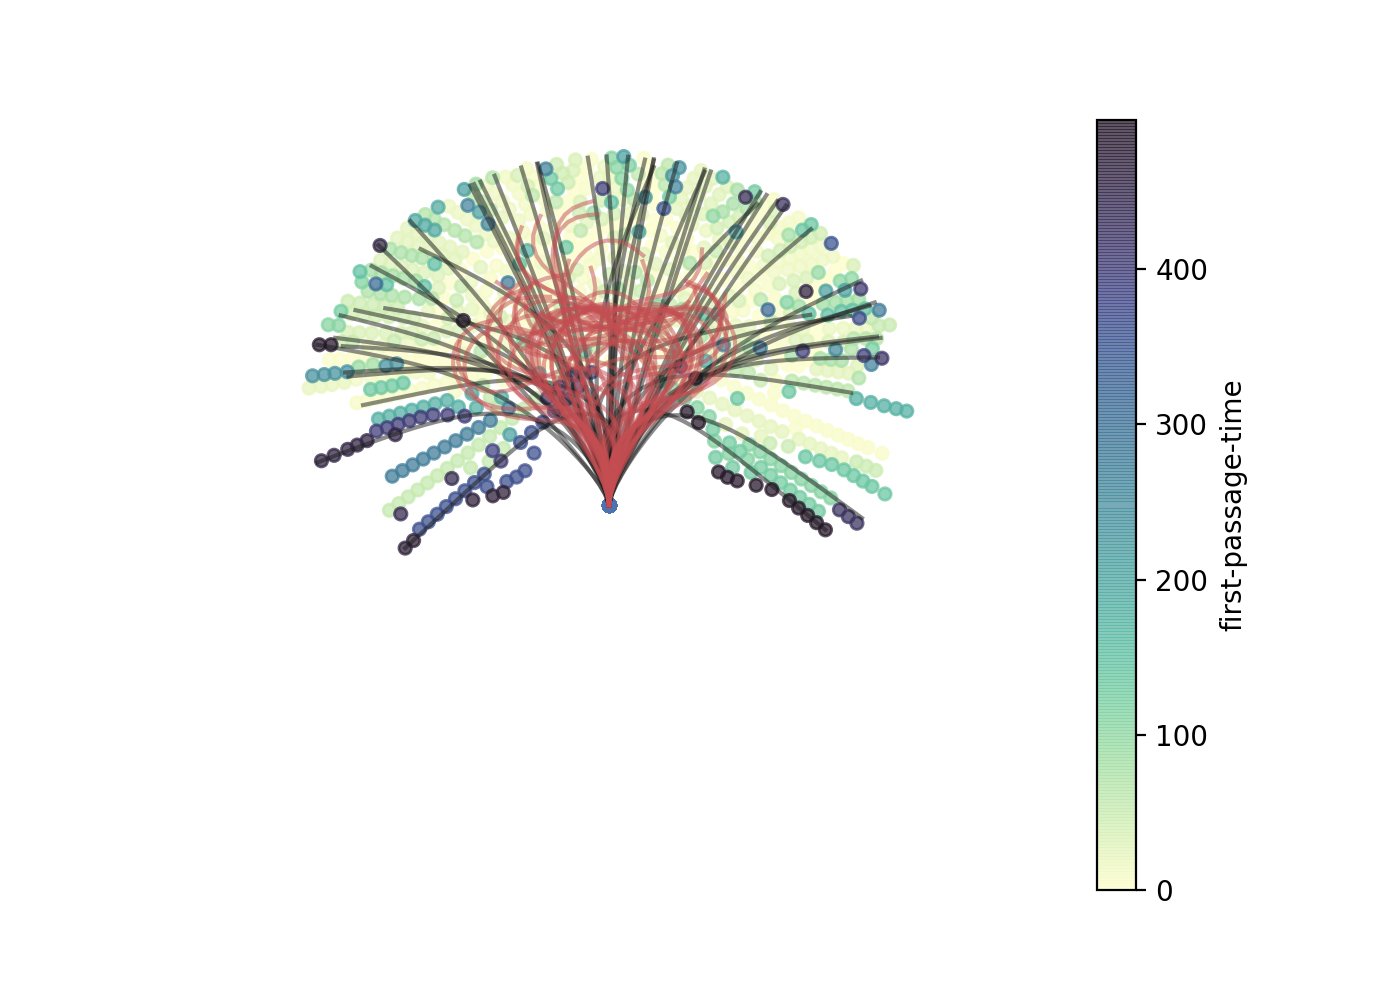

450
0
500
3.141592653589793
499
Total hits : 37501
saving figure...


In [22]:
plt.style.use('default')
plt.close('all')

filament.filament_tip_coverage()
filament.plot_tip_scatter_density(save = True, skip_cycles=450, save_folder=publication_figures, plot_unique_locations=True, color_by= 'first-passage-time')

## Filament Tip Unique Locations Cloud

In [26]:
filament.filament_tip_coverage()

Loading data from file...


Total hits : 37501


<IPython.core.display.Javascript object>


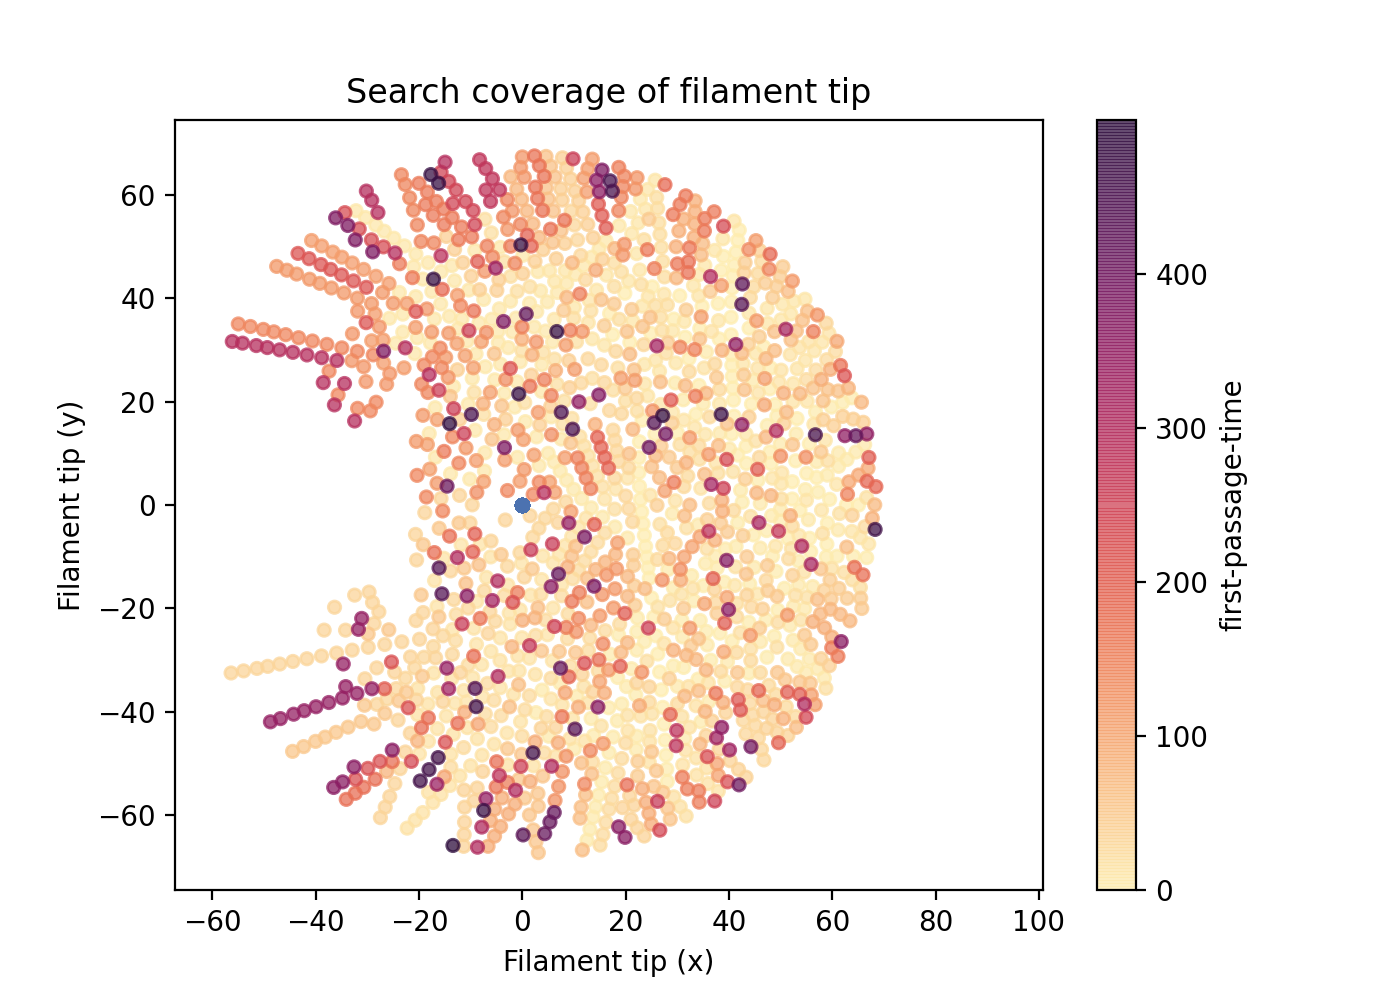

In [27]:
filament.plot_unique_tip_locations(color_by= 'first-passage-time')


## Distribution of first passage times

<IPython.core.display.Javascript object>


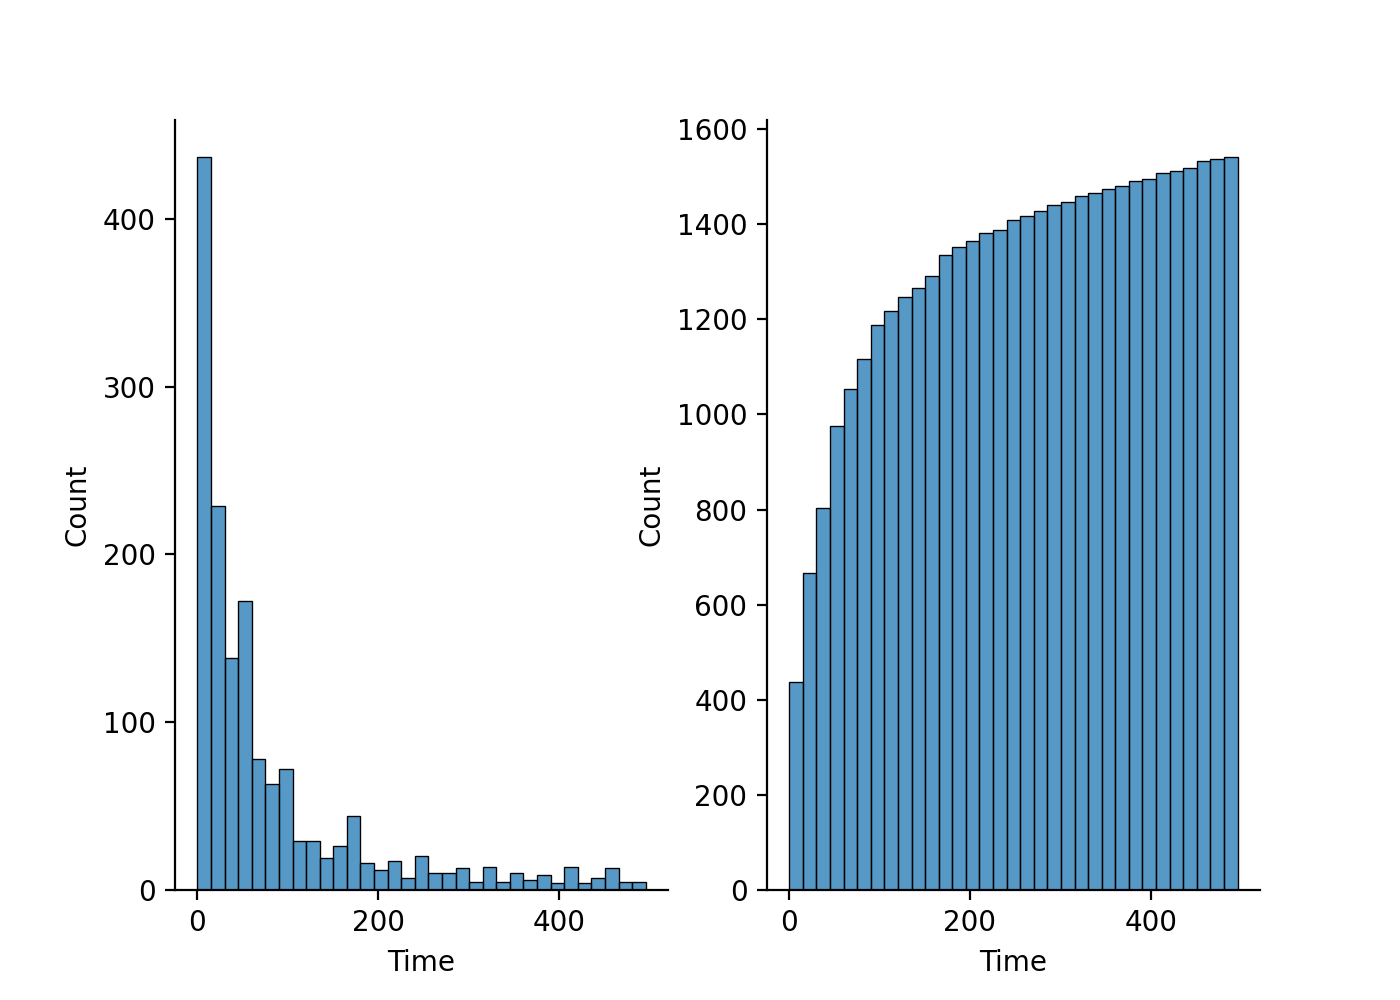

In [25]:
first_passage_cycle = filament.unique_position_times/filament.activity_timescale

f, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize=(7, 5))
sns.despine(f)

sns.histplot(x = first_passage_cycle, stat = 'count', ax = ax0)
sns.histplot(x = first_passage_cycle, stat = 'count', ax = ax1, cumulative=True)
plt.show()

In [ ]:
# Time to reach X% of total visited sites...
